**Submission**

Proyek Akhir : Klasifikasi Gambar

**Identitas Diri**

> Nama : Indra Putra Mahayuda

> Email : indraa25.pmy@gmail.com

> Asal : Kabupaten Madiun, Jawa Timur

> Kelas : Machine Learning Untuk Pemula









Deskripsi :

  Pada Proyek ini, saya membuat program jaringan syaraf tiruan menggunakan tensorflow untuk mengklasifikasi gambar. Gambar yang diklasifikasi adalah kertas, batu, dan gunting.

  Arsitektur dari model ini terdiri dari 5 konvolusi dan max pooling layer,  1 flatten layer dan 3 dense layer, dimana dense layer terakhir merupakan output layer. Optimizer yang digunakan adalah Adamax. 



In [1]:
#import and unzip dataset

!wget --no-check-certificate https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip /content/rockpaperscissors.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM

In [2]:
#import library

import os
import tensorflow as tf
import shutil

In [3]:
#make train and validation directory

base_dir = '/content/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

if(os.path.exists(train_dir) == False):
  os.mkdir(train_dir)
if(os.path.exists(val_dir) == False):
  os.mkdir(val_dir)

In [4]:
#splitting dataset

kelas = ['rock', 'paper', 'scissors']
n_val = 0.4

for subkelas in kelas :
  dir = os.path.join(base_dir, subkelas)
  train_dest = os.path.join(train_dir, subkelas)
  val_dest = os.path.join(val_dir, subkelas)

  if(os.path.exists(train_dest) == False):
    os.mkdir(train_dest)
  if(os.path.exists(val_dest) == False):
    os.mkdir(val_dest)
  
  i = 1

  for filename in os.listdir(dir):
    if(i < len(os.listdir(dir))*n_val):
      source = dir + '/' + filename
      destination = val_dest + '/' + filename
    else:
      source = dir + '/' + filename
      destination = train_dest + '/' + filename

    shutil.copy(source, destination)
    print("berhasil disalin ke : ", destination)
    i += 1

berhasil disalin ke :  /content/rockpaperscissors/validation/rock/I8DyB4yRN0Q8voWp.png
berhasil disalin ke :  /content/rockpaperscissors/validation/rock/eb93o1ZDeBlrdfyc.png
berhasil disalin ke :  /content/rockpaperscissors/validation/rock/s89nGNUsKL1q4vtJ.png
berhasil disalin ke :  /content/rockpaperscissors/validation/rock/esqqaIq6wKOr8EK6.png
berhasil disalin ke :  /content/rockpaperscissors/validation/rock/muKpkJF3C3j0TmAN.png
berhasil disalin ke :  /content/rockpaperscissors/validation/rock/2DdERUV7Te8ivywq.png
berhasil disalin ke :  /content/rockpaperscissors/validation/rock/G1MuiTHGqQ6CN122.png
berhasil disalin ke :  /content/rockpaperscissors/validation/rock/o2a42Or5QnATFbf7.png
berhasil disalin ke :  /content/rockpaperscissors/validation/rock/nW7S3LYj4C49mX06.png
berhasil disalin ke :  /content/rockpaperscissors/validation/rock/lfR51TrQjuKJXkT6.png
berhasil disalin ke :  /content/rockpaperscissors/validation/rock/SNEJ1wGU1s9Dm3I1.png
berhasil disalin ke :  /content/rockpapersc

In [5]:
#check persentase of dividing data

rock_train = os.path.join(train_dir, 'rock')
paper_train = os.path.join(train_dir, 'paper')
scissors_train = os.path.join(train_dir, 'scissors')

rock_val = os.path.join(val_dir, 'rock')
paper_val = os.path.join(val_dir, 'paper')
scissors_val = os.path.join(val_dir, 'scissors')

n_data_train = len(os.listdir(rock_train)) + len(os.listdir(paper_train)) + len(os.listdir(scissors_train))
n_data_val = len(os.listdir(rock_val)) + len(os.listdir(paper_val)) + len(os.listdir(scissors_val))

print("total data train : {0} ==> persentase : {1:.2f}".format(n_data_train, n_data_train/(n_data_val+n_data_train)))
print("total data validation : {0} ==> persentase : {1:.2f}".format(n_data_val, n_data_val/(n_data_val+n_data_train)))

total data train : 1315 ==> persentase : 0.60
total data validation : 873 ==> persentase : 0.40


In [6]:
#preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range = 25, 
                                   shear_range = 0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip = True, 
                                   vertical_flip = True,
                                   fill_mode = 'nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (200, 200),
                                                    batch_size = 32,
                                                    class_mode = 'categorical'
                                                    )
val_generator = train_datagen.flow_from_directory(val_dir, 
                                                  target_size = (200, 200),
                                                  batch_size = 32,
                                                  class_mode = 'categorical'
                                                  )
                              

Found 1315 images belonging to 3 classes.
Found 873 images belonging to 3 classes.


In [7]:
#build architecture model

model = tf.keras.models.Sequential(
    [
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')      
    ]
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [9]:
#compile model

model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy']
              )

In [10]:
#make a callback function to stop training 

class trainingStopped(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.96):
      print('Training dihentikan karena akurasi sudah mencapai 96%')
      self.model.stop_training=True

In [11]:
#training model

callback = trainingStopped()

history = model.fit(train_generator,
                    steps_per_epoch=25,
                    epochs=20,
                    callbacks=[callback],
                    validation_data=val_generator,
                    validation_steps=5,
                    verbose=2)

Epoch 1/20
25/25 - 14s - loss: 1.0919 - accuracy: 0.3385 - val_loss: 1.0478 - val_accuracy: 0.3750 - 14s/epoch - 574ms/step
Epoch 2/20
25/25 - 10s - loss: 0.8272 - accuracy: 0.6012 - val_loss: 0.6603 - val_accuracy: 0.6938 - 10s/epoch - 414ms/step
Epoch 3/20
25/25 - 11s - loss: 0.5581 - accuracy: 0.7713 - val_loss: 0.6028 - val_accuracy: 0.7750 - 11s/epoch - 456ms/step
Epoch 4/20
25/25 - 11s - loss: 0.5074 - accuracy: 0.7912 - val_loss: 0.3960 - val_accuracy: 0.8375 - 11s/epoch - 424ms/step
Epoch 5/20
25/25 - 10s - loss: 0.4067 - accuracy: 0.8379 - val_loss: 0.4842 - val_accuracy: 0.8188 - 10s/epoch - 409ms/step
Epoch 6/20
25/25 - 10s - loss: 0.4195 - accuracy: 0.8340 - val_loss: 0.4038 - val_accuracy: 0.8625 - 10s/epoch - 407ms/step
Epoch 7/20
25/25 - 10s - loss: 0.3393 - accuracy: 0.8725 - val_loss: 0.2829 - val_accuracy: 0.8938 - 10s/epoch - 407ms/step
Epoch 8/20
25/25 - 10s - loss: 0.3554 - accuracy: 0.8737 - val_loss: 0.3768 - val_accuracy: 0.8625 - 10s/epoch - 415ms/step
Epoch 9/

<function matplotlib.pyplot.show>

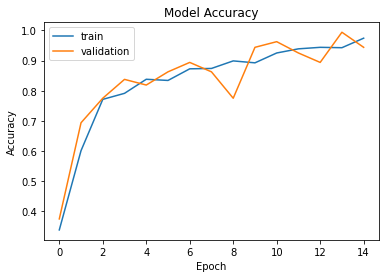

In [15]:
#visualize of model accuracy

import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show

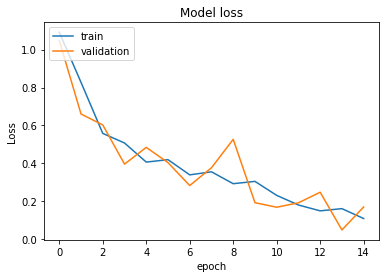

In [13]:
#visualize of loss model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Saving scissors_predict.png to scissors_predict (1).png
Prediction = 
scissors


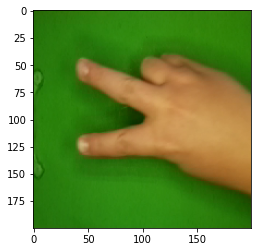

In [14]:
# predicting images

from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(200,200))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)
  for i in classes:
    print('Prediction = ')
    if(i[0]==1):
      print("paper")
    elif(i[1]==1):
      print("rock")
    elif(i[2]==1):
      print("scissors")